<a href="https://colab.research.google.com/github/DanielBrisch/CapturandoMoedas/blob/main/Mario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

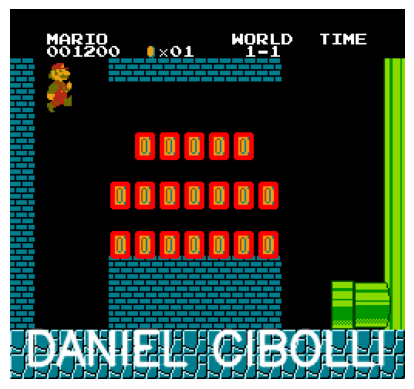

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv.imread('mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

font_scale = 1
font_thickness = 2
font = cv.FONT_HERSHEY_SIMPLEX
(text_width, text_height), _ = cv.getTextSize('DANIEL CIBOLLI', font, font_scale, font_thickness)

x = (img_rgb.shape[1] - text_width) // 2
y = img_rgb.shape[0] - 10

img_rgb = cv.putText(img_rgb, 'DANIEL CIBOLLI', (x, y), font, font_scale, (255,255,255), font_thickness, cv.LINE_AA)

img_rgb_to_show = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb_to_show)
plt.axis('off')
plt.show()
